# Solutions (Challenges)

## NumPy

In [1]:
import numpy as np
from math import cos, sin, ceil

1. Suppose you have the following vectors `[1, 2, 3]` and `[8, 0, 4]`.

In [2]:
a = np.array([1, 2, 3])
b = np.array([8, 0, 4])

2. Calculate a vector perpendicular to them.

In [3]:
c = np.cross(a, b)
c

array([  8,  20, -16])

3. Rotate it by 45º degrees around the X axis.

In [4]:
c = np.hstack([c, 1])

α = np.pi / 4

R = np.array([
    [1, 0, 0, 0],
    [0, cos(α), -sin(α), 0],
    [0, sin(α), cos(α), 0],
    [0, 0, 0, 1]
])

c = R.dot(c)
c

array([ 8.        , 25.45584412,  2.82842712,  1.        ])

4. Scale it by 150% in the Z axis.

In [5]:
S = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1.5, 0],
    [0, 0, 0, 1]
])

c = S.dot(c)
c

array([ 8.        , 25.45584412,  4.24264069,  1.        ])

5. Translate it by 10 units in the Y axis.

In [6]:
T = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 10],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])

c = T.dot(c)
c

array([ 8.        , 35.45584412,  4.24264069,  1.        ])

6. Check what's the biggest coordinate value of the resulting vector. 

In [7]:
c = c[:3]

m = np.max(c)
m

35.45584412271571

7. Create a vector with that same number (rounded up) of evenly spaced values (between 0 and 100) and sum the first half of them.

In [8]:
m = ceil(m)

d = np.linspace(0, 100, m)
e = np.hsplit(d, 2)[0]

np.sum(e)

437.1428571428571

## Matplotlib

In [12]:
import numpy as np
import matplotlib.pyplot as plt

1. Generate a random data array
2. Plot it using a scatter plot taking their weight into consideration
3. Divide the plot into three (split it in 2/3 horizontally and then split the right 1/3 in half vertically)
4. Represent the histogram for that data in the first subplot
5. Represent an unweighted scatter plot for that data in the second subplot

Text(0.5, 1.0, 'Unweighted scatter plot')

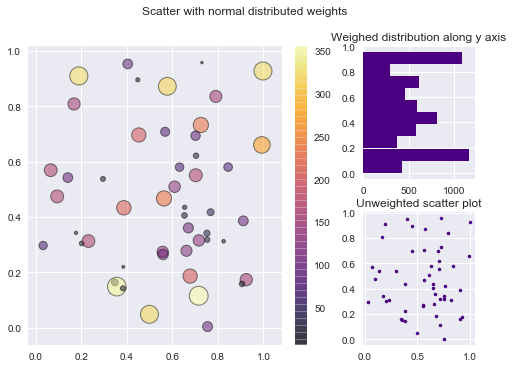

In [14]:
plt.style.use('seaborn')

x = np.random.random(50)
y = np.random.random(50)
w = abs(np.random.randn(50)) * 150

fig = plt.figure()
fig.suptitle('Scatter with normal distributed weights')
gs = fig.add_gridspec(2, 3, hspace=0.25, wspace=0.5)

ax1 = fig.add_subplot(gs[:, :2])  # Main Scatter plot
ax2 = fig.add_subplot(gs[0, 2])  # Histogram
ax3 = fig.add_subplot(gs[1, 2])  # Secondary Scatter plot

# Main Scatter
scatter1 = ax1.scatter(x, y, s=w, c=w, cmap='inferno', alpha=0.5, edgecolors='k', linewidths=1)
# ax1.set_axis_off()

# vertical colorbar (Just for curiosity)
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
ax1_divider = make_axes_locatable(ax1)
# Add an axes to the right of the main axes.
cax1 = ax1_divider.append_axes("right", size="5%", pad="5%", )
cb1 = fig.colorbar(scatter1, cax=cax1)

# Histogram
ax2.hist(y, bins=10, weights=w, orientation='horizontal', color='indigo')
ax2.set_title('Weighed distribution along y axis')

# Secondary Scatter
ax3.plot(x, y, ls='', marker='.', c='indigo')
ax3.set_title('Unweighted scatter plot')

## SymPy

In [ ]:
from sympy import *

1. Suppose you have the function $f(x) = x^{3} - 2$ and the points $(2, 3)$ and $(4, 5)$.

In [ ]:
x, y = symbols("x y")

f = x ** 3 - 2

P1 = Point(2, 3)
P2 = Point(4, 5)

f

2. Obtain the median point of a line connecting those two points and admit a circle centered there and with radius 2.

In [ ]:
l = Segment2D(P1, P2)
P = l.midpoint    
P

3. Integrate the function between the two points where it intersects the circle.

In [ ]:
C = Eq((x - P.x) ** 2 + (y - P.y) ** 2, 4)

C1, C2 = solveset(C.subs({y: f}), x,domain=Reals)

intr = Integral(f, (x, C1.evalf(), C2.evalf()))    

intr

4. Replace *n* in the following ODE $g''(x) + g(x) = n$  by the first decimal digit of the value you obtained in the last step.

In [ ]:
n = int((intr.doit() - int(intr)) * 10)  

g = symbols("g", cls=Function)

diffeq = Eq(g(x).diff(x, x) + g(x).diff(x), n)

diffeq

5. Solve the ODE (admit 1 for constant values. **Note:** Take a look at `ics` argument).

In [ ]:
ics = {g(0): 1, g(x).diff(x).subs(x, 0): 1}

s = dsolve(diffeq, ics=ics)

s

6. Evaluate its value at $x = 4$ and compute the difference to 10 decimal places.

In [ ]:
s.subs(x, 4).evalf(10)    